# Ejercicio 1: Detección de Malware

## Importar bibliotecas necesarias

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Cargar dataset

In [12]:
features_df = pd.read_csv('/content/sample_data/dataset-features-categories.csv')
malware_df = pd.read_csv('/content/sample_data/malware_dataset.csv')


<ipython-input-12-659b8158fc90>:2: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  malware_df = pd.read_csv('/content/sample_data/malware_dataset.csv')


## **Tarea 1a**: Realiza una descripción del dataset

### Mostrar parte de los datasets

Mostrar los dataset para poder saber su contenido.

In [13]:
features_df.head()

,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature


In [14]:
malware_df.head()


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


### Información del dataset

In [15]:
malware_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


### Estadisticas del dataset principal

Calculamos las estadísticas del dataset de malware

In [16]:
malware_df.describe()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS
count,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,...,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000,15036.000000
mean,0.426443,0.446595,0.442671,0.413208,0.444932,0.486898,0.236632,0.330806,0.282389,0.312583,...,0.007050,0.233307,0.017425,0.004256,0.434424,0.666135,0.290835,0.016028,0.007050,0.044959
std,0.494576,0.497156,0.496719,0.492426,0.496975,0.499845,0.425029,0.470519,0.450177,0.463561,...,0.083669,0.422950,0.130852,0.065105,0.495698,0.471608,0.454163,0.125588,0.083669,0.207220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Distrubución del malware

Hacemos una gráfica para ver la distribución de cuántos son malware

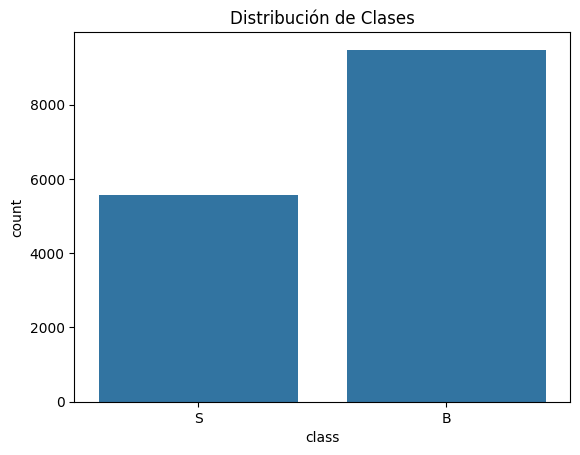

In [17]:
malware_df['class'].value_counts()
sns.countplot(x='class', data=malware_df)
plt.title('Distribución de Clases')
plt.show()

## **Tarea 1b**: Realiza las tareas de pre-procesamiento

### Reemplazar valores no numéricos

La columna "class" tiene valores S y B para sabar si es malware (S) o si es benigno (M) con lo cual se les corresponderá a 1 y 0 respectivamente

In [18]:
malware_df.replace({'S': 1, 'B': 0}, inplace=True)

### Reemplazar valores nulos

En el dataset detectamos que para simbolizar los valores nulos se utiliza "?" con lo que debemos sustituirlo por NaN y luego eliminamos dichos valores nulos

In [19]:
malware_df.replace('?', np.nan, inplace=True)
malware_df.dropna(inplace=True)

### Correlación de características

Hacemos una matriz de correlación de las caracteríaticas ahora que el dataset está limpio

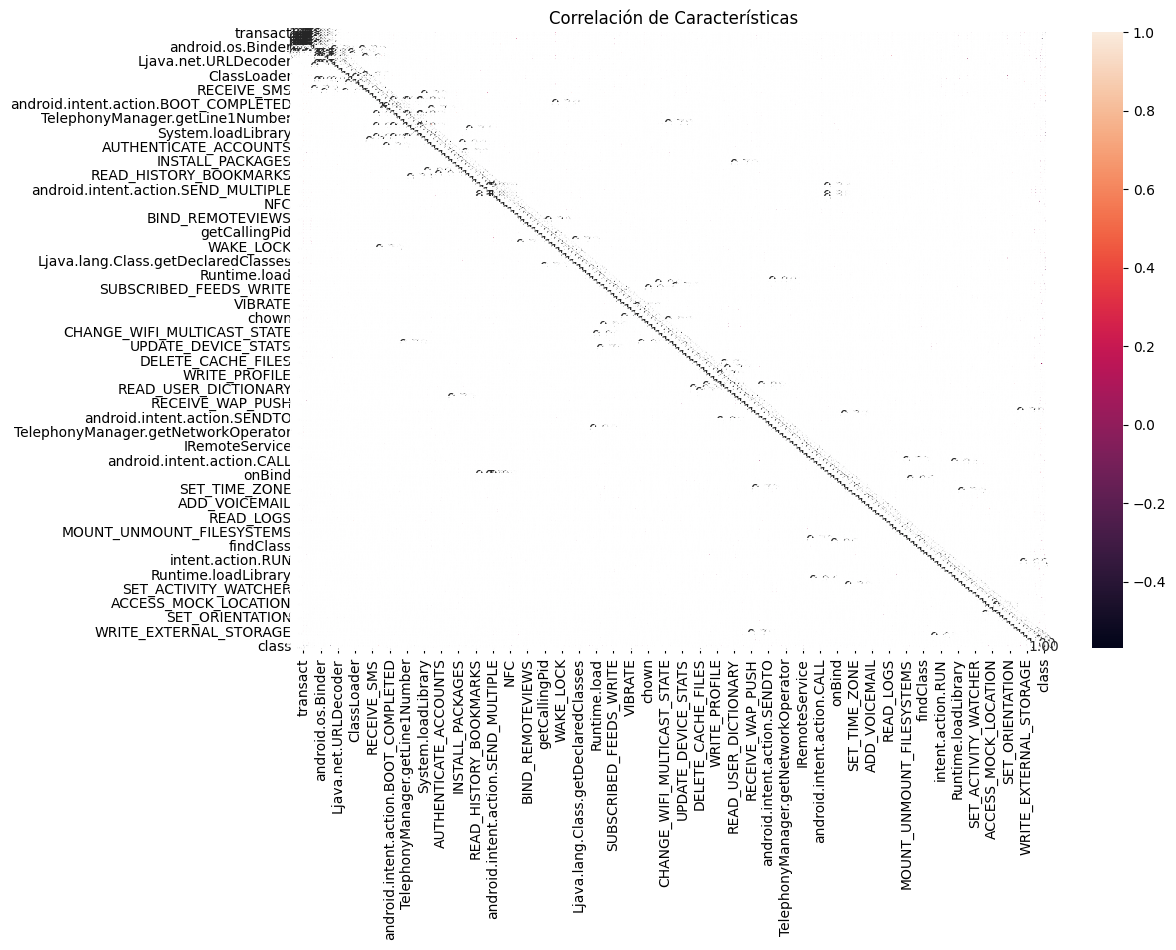

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(malware_df.corr(), annot=True, fmt='.2f')
plt.title('Correlación de Características')
plt.show()

### Selección de características

1. Dividimos entre características y etiqueta
2. Escalamos las caracteríaticas con StandarScaler
3. Seleccionamos las características usando SelectKBest

In [21]:
X = malware_df.drop(columns=['class'])
y = malware_df['class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

## **Tarea 1c**: Entrega y evalúa al menos 3 algoritmos de clasificación

### División entre conjunto de entrenamiento y prueba

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Definición de clasificadores elegidos

* Random Forest
* Máquina de Soporte Vectorial
* KNN

In [23]:
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

### Evaluación de los clasificadores

Primero se entrenará cada clasficador y luego se evaluará, como sospechamos que hay probabilidad de underfitting u overfitting se hará sobre el conjunto de entrenamiento y el conjunto de test.

=== Random Forest ===
Train Accuracy: 0.8298640813610874
Train Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6645
           1       0.92      0.59      0.72      3876

    accuracy                           0.83     10521
   macro avg       0.86      0.78      0.80     10521
weighted avg       0.85      0.83      0.82     10521

Test Accuracy: 0.834589800443459
Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2831
           1       0.93      0.60      0.73      1679

    accuracy                           0.83      4510
   macro avg       0.87      0.79      0.81      4510
weighted avg       0.85      0.83      0.82      4510



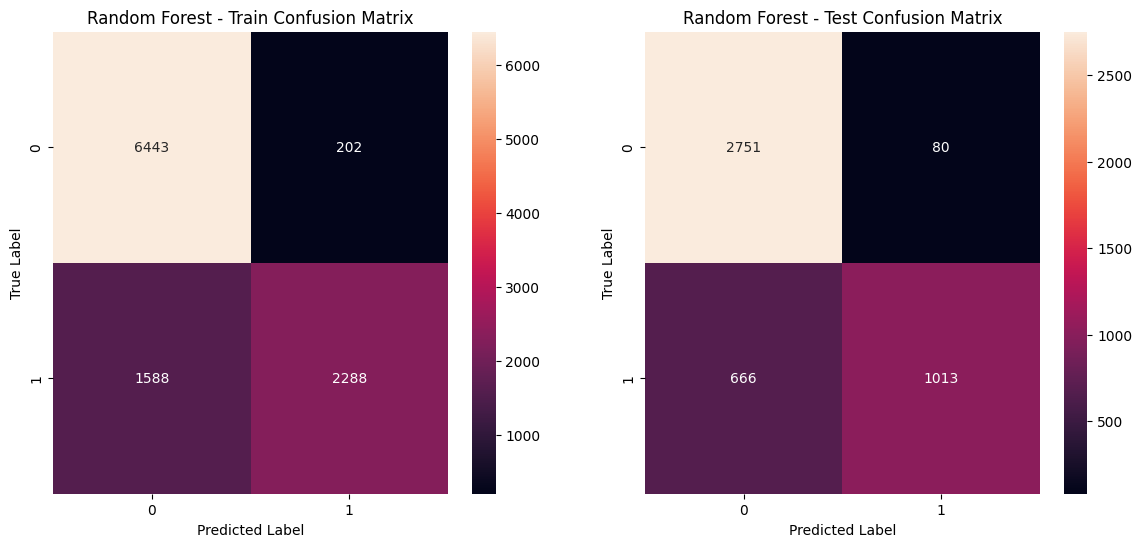

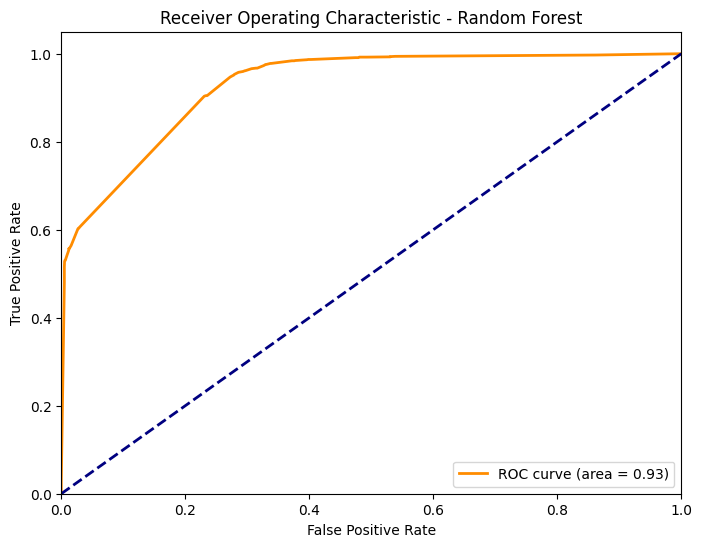

Cross-validation scores: [0.83106086 0.83832335 0.82634731 0.83499667 0.82002661]
Mean CV score: 0.8301509606880906
=== Support Vector Machine ===
Train Accuracy: 0.8194088014447296
Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      6645
           1       0.96      0.53      0.68      3876

    accuracy                           0.82     10521
   macro avg       0.87      0.76      0.78     10521
weighted avg       0.85      0.82      0.80     10521

Test Accuracy: 0.8210643015521064
Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2831
           1       0.96      0.54      0.69      1679

    accuracy                           0.82      4510
   macro avg       0.87      0.76      0.78      4510
weighted avg       0.85      0.82      0.81      4510



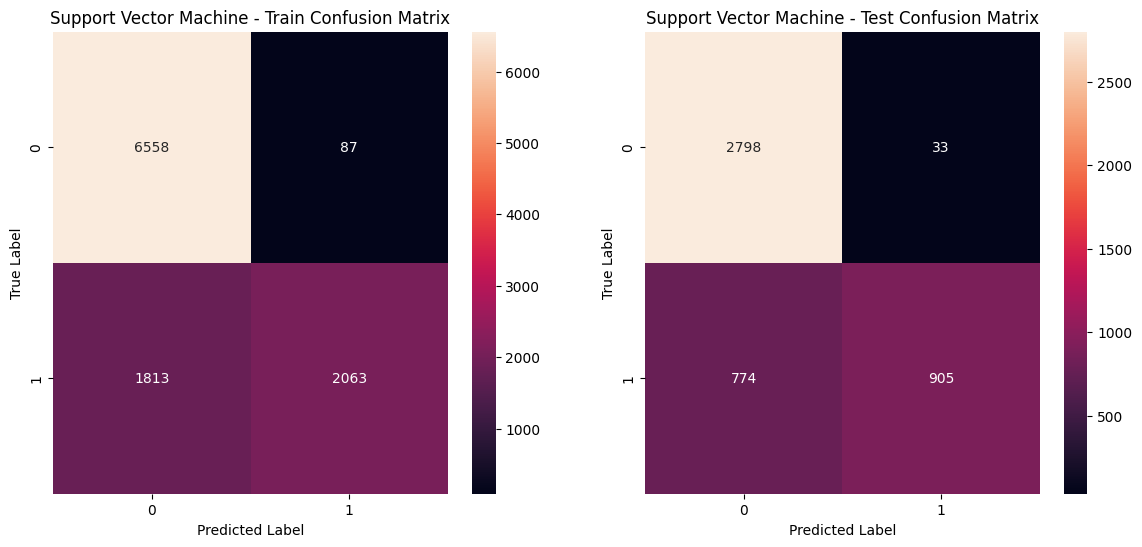

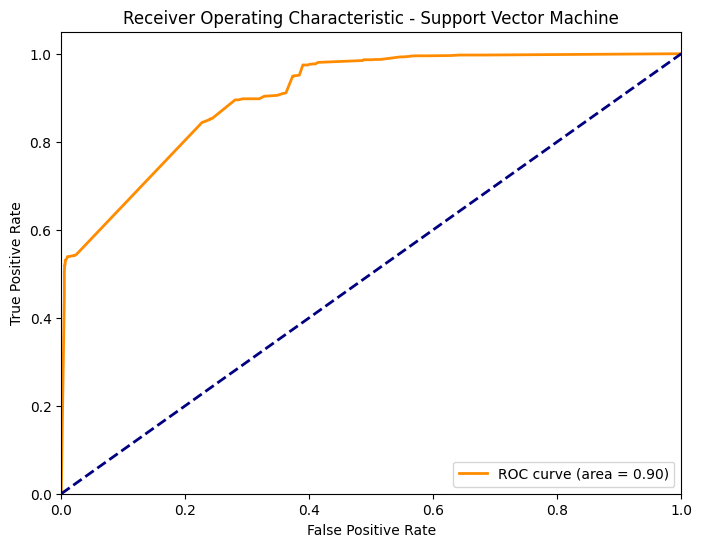

Cross-validation scores: [0.82141669 0.82235529 0.8160346  0.82601464 0.80073187]
Mean CV score: 0.817310617651738
=== K-Nearest Neighbors ===
Train Accuracy: 0.8047714095618287
Train Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      6645
           1       0.83      0.59      0.69      3876

    accuracy                           0.80     10521
   macro avg       0.81      0.76      0.77     10521
weighted avg       0.81      0.80      0.80     10521

Test Accuracy: 0.8088691796008869
Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2831
           1       0.85      0.59      0.70      1679

    accuracy                           0.81      4510
   macro avg       0.82      0.76      0.78      4510
weighted avg       0.81      0.81      0.80      4510



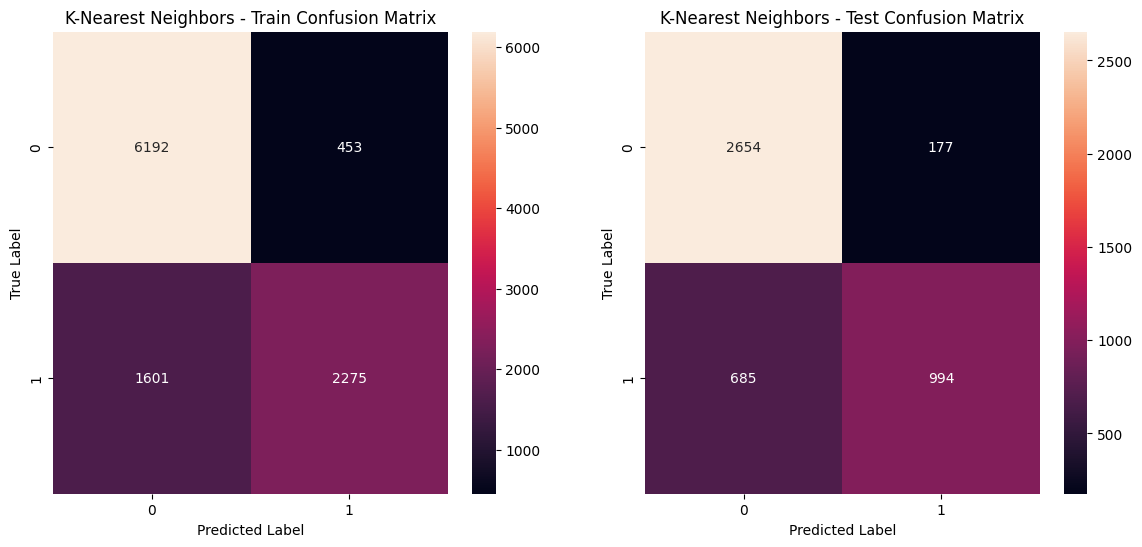

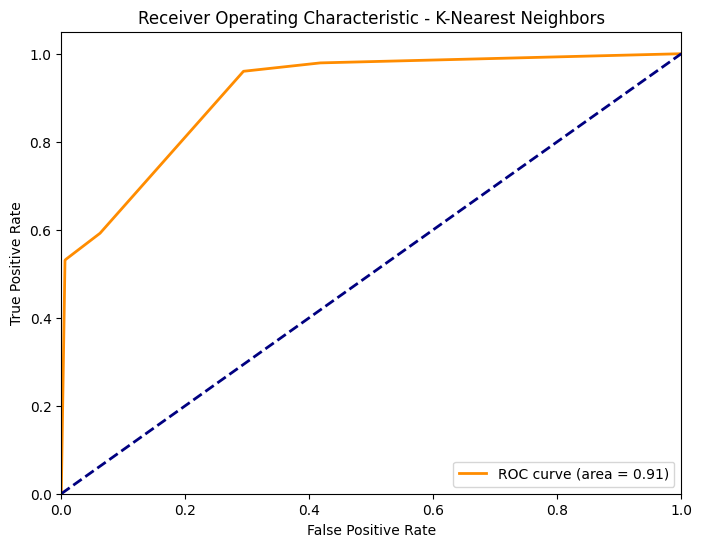

Cross-validation scores: [0.48187562 0.50532269 0.48536261 0.47837658 0.500998  ]
Mean CV score: 0.49038710075691655


In [24]:
# Evaluación de clasificadores
for name, clf in classifiers.items():
    # Entrenar
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Evaluar
    print(f'=== {name} ===')

    # Métricas en conjunto de entrenamiento
    print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Train Classification Report:')
    print(classification_report(y_train, y_pred_train))

    # Métricas en conjunto de prueba
    print('Test Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Test Classification Report:')
    print(classification_report(y_test, y_pred_test))

    # Matrices de confusión
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', ax=ax[0])
    ax[0].set_title(f'{name} - Train Confusion Matrix')
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')

    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', ax=ax[1])
    ax[1].set_title(f'{name} - Test Confusion Matrix')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    plt.show()

    # Curva ROC
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
    else:  # For SVM
        y_prob = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()

    # Validación cruzada
    cv_scores = cross_val_score(clf, X_new, y, cv=5)
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean CV score: {cv_scores.mean()}')



Como vemos, la calidad del entrenamiento con los dos conjuntos en todos los algoritmos es similar así que descartamos las hipótesis anteriores

## Extra: Entrenamiento con Grid Search

Entrenamos los clasificadores con Grid Search para ver si mejora la calidad pero como vemos se mantiene

=== Random Forest ===
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Train Accuracy: 0.8298640813610874
Train Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6645
           1       0.92      0.59      0.72      3876

    accuracy                           0.83     10521
   macro avg       0.86      0.78      0.80     10521
weighted avg       0.85      0.83      0.82     10521

Test Accuracy: 0.8348115299334812
Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2831
           1       0.93      0.60      0.73      1679

    accuracy                           0.83      4510
   macro avg       0.87      0.79      0.81      4510
weighted avg       0.85      0.83      0.82      4510



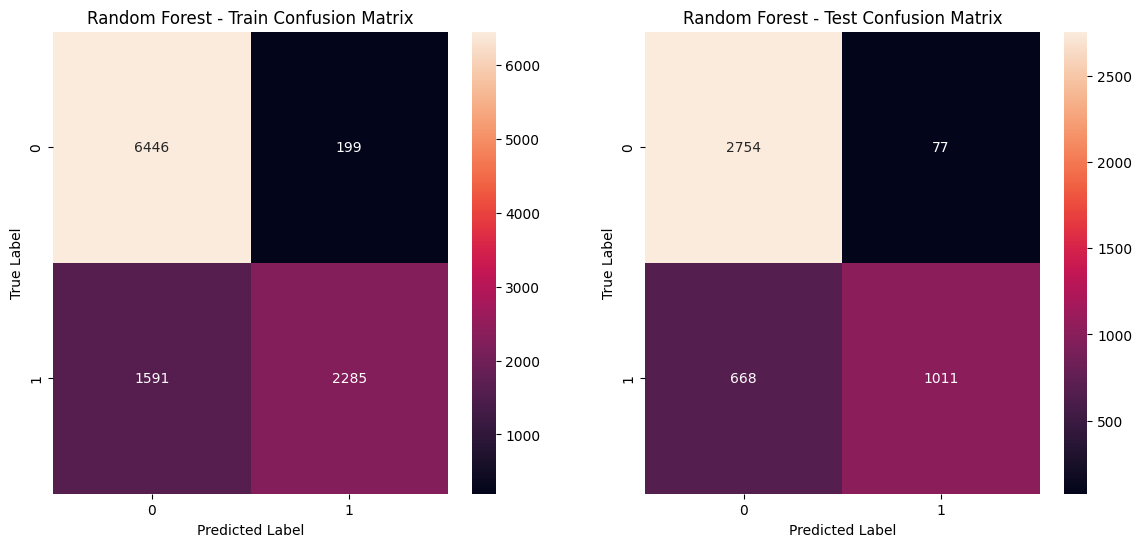

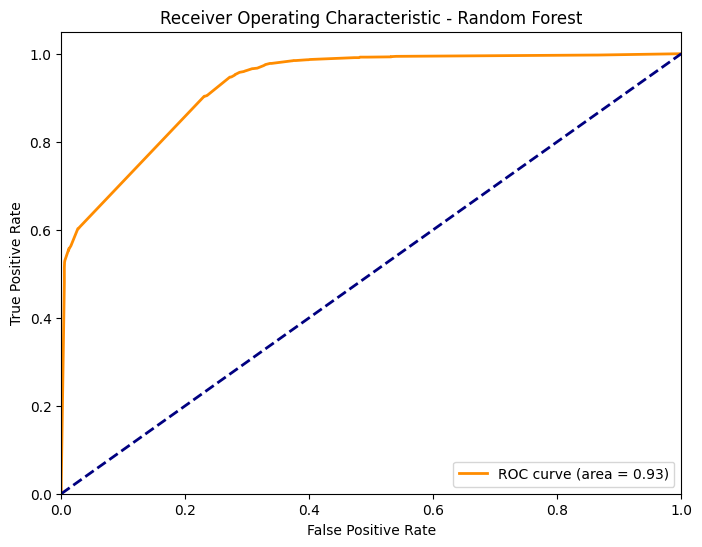

=== Support Vector Machine ===
Best parameters: {'C': 10}
Train Accuracy: 0.8190286094477711
Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      6645
           1       0.96      0.53      0.68      3876

    accuracy                           0.82     10521
   macro avg       0.87      0.76      0.78     10521
weighted avg       0.85      0.82      0.80     10521

Test Accuracy: 0.8210643015521064
Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2831
           1       0.96      0.54      0.69      1679

    accuracy                           0.82      4510
   macro avg       0.87      0.76      0.78      4510
weighted avg       0.85      0.82      0.81      4510



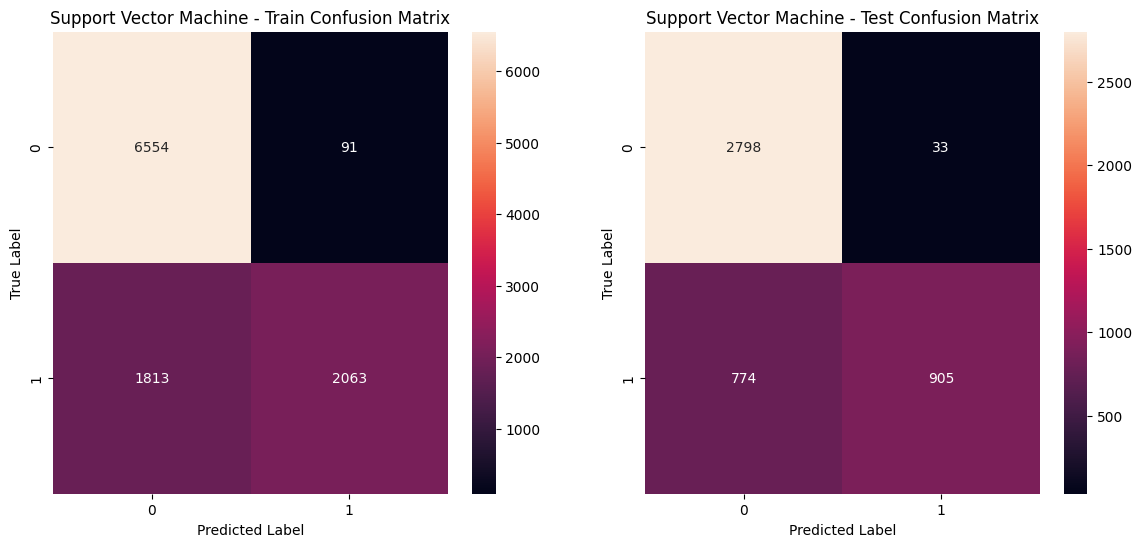

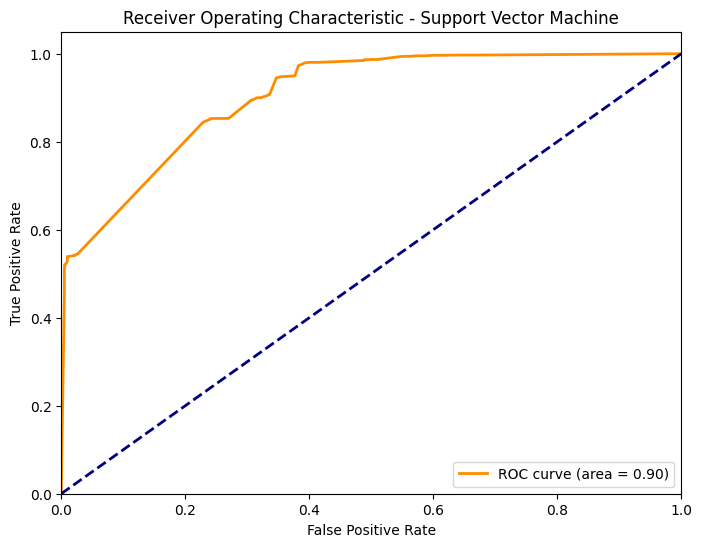

=== K-Nearest Neighbors ===
Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Train Accuracy: 0.8058169375534645
Train Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      6645
           1       0.84      0.59      0.69      3876

    accuracy                           0.81     10521
   macro avg       0.82      0.76      0.77     10521
weighted avg       0.81      0.81      0.80     10521

Test Accuracy: 0.8088691796008869
Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2831
           1       0.85      0.59      0.70      1679

    accuracy                           0.81      4510
   macro avg       0.82      0.76      0.78      4510
weighted avg       0.81      0.81      0.80      4510



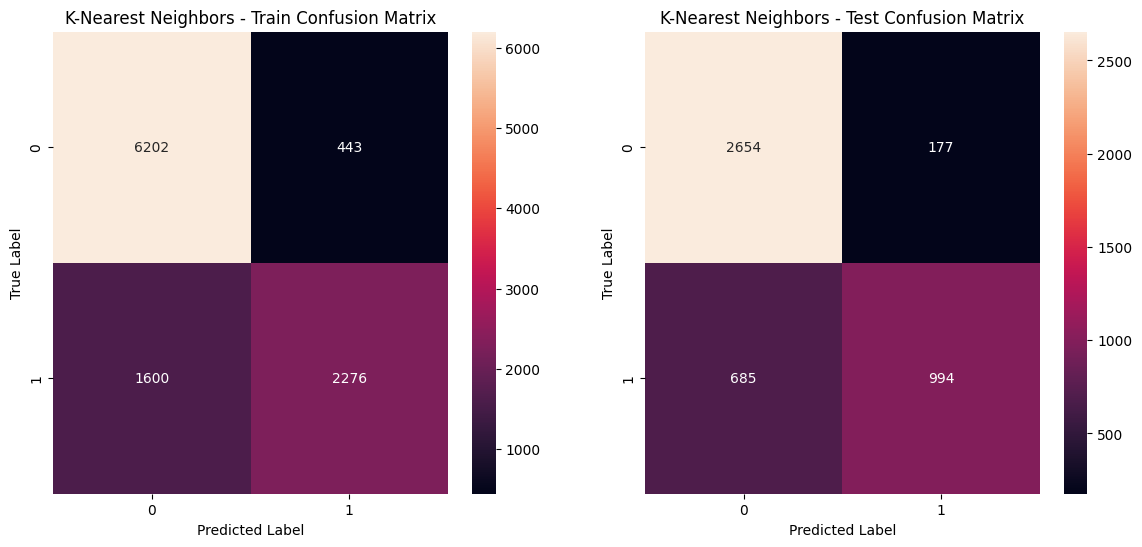

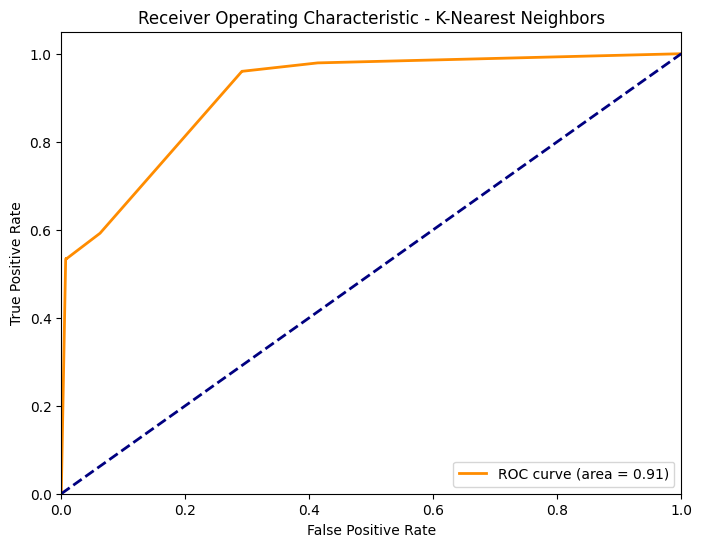

In [25]:
# Definir clasificadores y sus hiperparámetros para grid search
param_grid = {
    'Random Forest': {
        'clf': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Support Vector Machine': {
        'clf': SVC(kernel='linear', probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10, 100],
        }
    },
    'K-Nearest Neighbors': {
        'clf': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    }
}

# Evaluación de clasificadores con GridSearchCV y validación cruzada
for name, model in param_grid.items():
    clf = model['clf']
    params = model['params']

    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_clf = grid_search.best_estimator_
    y_pred_train = best_clf.predict(X_train)
    y_pred_test = best_clf.predict(X_test)

    # Evaluar
    print(f'=== {name} ===')
    print('Best parameters:', grid_search.best_params_)

    # Métricas en conjunto de entrenamiento
    print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Train Classification Report:')
    print(classification_report(y_train, y_pred_train))

    # Métricas en conjunto de prueba
    print('Test Accuracy:', accuracy_score(y_test, y_pred_test))
    print('Test Classification Report:')
    print(classification_report(y_test, y_pred_test))

    # Matrices de confusión
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', ax=ax[0])
    ax[0].set_title(f'{name} - Train Confusion Matrix')
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')

    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', ax=ax[1])
    ax[1].set_title(f'{name} - Test Confusion Matrix')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    plt.show()

    # Curva ROC
    if hasattr(best_clf, "predict_proba"):
        y_prob = best_clf.predict_proba(X_test)[:, 1]
    else:  # For SVM
        y_prob = best_clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()
